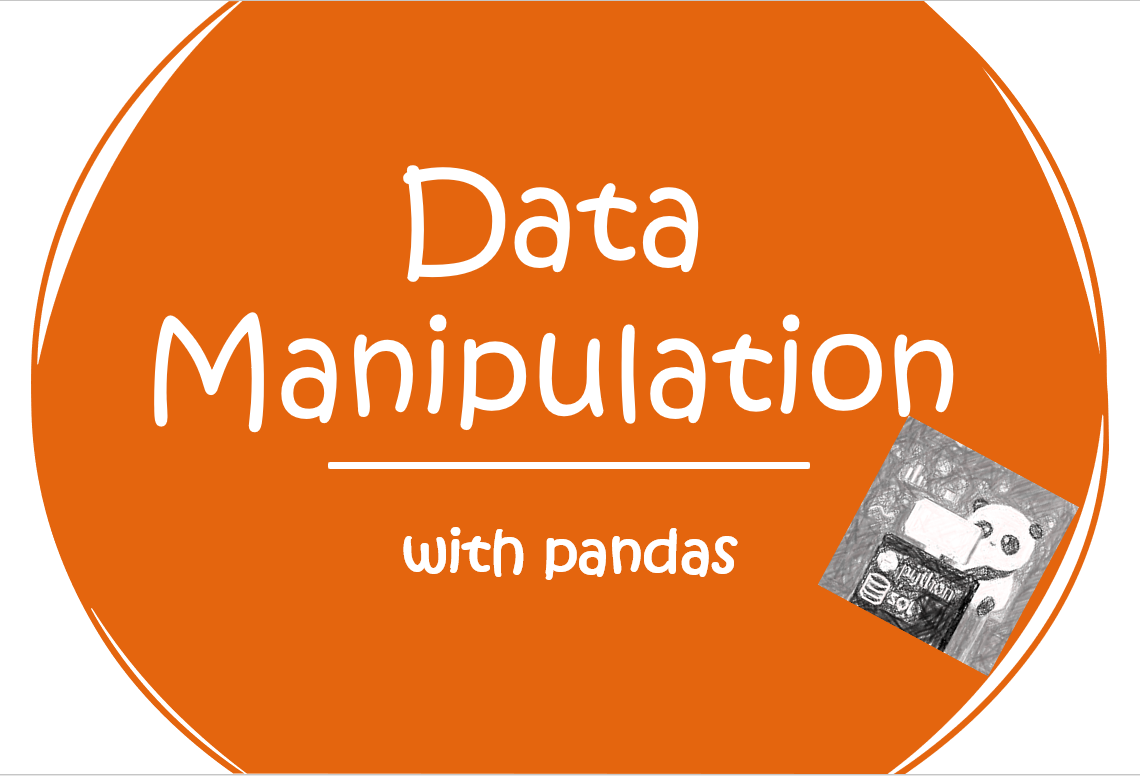

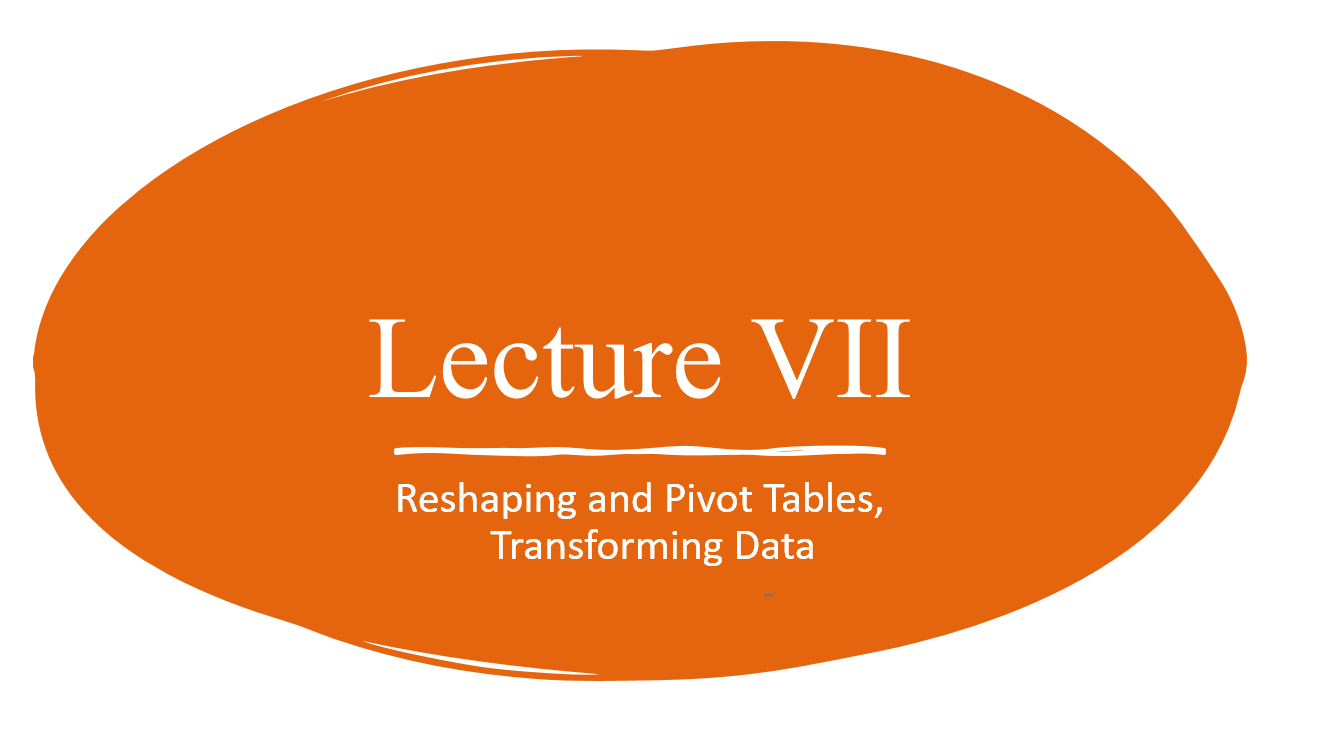

### <span style='background: Orange'> Import Libraries!</span>

In [1]:
import numpy as np
import pandas as pd

## <span style='color: Orange'> Starters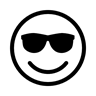 </span>

In [2]:
df = pd.DataFrame({'degree': ['bachelor', 'bachelor', 'bachelor', 'bachelor', 'master',
                           'master', 'doctorate','doctorate','doctorate'],
                   'level': [1,2,3,4,1,2,1,2,3],
                   'grades': ['4.00', '3.57', '3.58', '3.59', 'S', 'S','S','S','S']})

In [3]:
df

,degree,level,grades
0,bachelor,1,4.00
1,bachelor,2,3.57
2,bachelor,3,3.58
3,bachelor,4,3.59
4,master,1,S
5,master,2,S
6,doctorate,1,S
7,doctorate,2,S
8,doctorate,3,S


In [5]:
df.pivot(index='degree',columns='level',values='grades')

level,1,2,3,4
degree,,,,
bachelor,4.00,3.57,3.58,3.59
doctorate,S,S,S,NaN
master,S,S,NaN,NaN


In [6]:
df.pivot(index='degree',columns='level')['grades']

level,1,2,3,4
degree,,,,
bachelor,4.00,3.57,3.58,3.59
doctorate,S,S,S,NaN
master,S,S,NaN,NaN


**MELTING**

In [7]:
df_melt = pd.DataFrame({'City': {0: 'Izmir', 1: 'Ankara', 2: 'Istanbul'},
                   'Neighbourhood': {0: 'Karsiyaka', 1: 'Bahcelievler', 2: 'Bostanci'},
                   'Street': {0: 1775, 1: 352, 2: 1452}})

In [8]:
df_melt

,City,Neighbourhood,Street
0,Izmir,Karsiyaka,1775
1,Ankara,Bahcelievler,352
2,Istanbul,Bostanci,1452


In [10]:
pd.melt(df_melt,id_vars=['Neighbourhood'],value_vars=['Street'])

,Neighbourhood,variable,value
0,Karsiyaka,Street,1775
1,Bahcelievler,Street,352
2,Bostanci,Street,1452


In [11]:
pd.melt(df_melt,id_vars=['City'],value_vars=['Street','Neighbourhood'],ignore_index=False)

,City,variable,value
0,Izmir,Street,1775
1,Ankara,Street,352
2,Istanbul,Street,1452
0,Izmir,Neighbourhood,Karsiyaka
1,Ankara,Neighbourhood,Bahcelievler
2,Istanbul,Neighbourhood,Bostanci


### wide_to_long

In [12]:
np.random.seed(123) # random seed is a numerical value that generates a new set or repeats pseudo-random numbers. 
df_wtl = pd.DataFrame({"A1985" : {0 : "a", 1 : "b", 2 : "c"},
                   "A2020" : {0 : "d", 1 : "e", 2 : "f"},
                   "B1985" : {0 : 2.5, 1 : 1.2, 2 : .7},
                   "B2020" : {0 : 3.2, 1 : 1.3, 2 : .1},
                   "Y"     : dict(zip(range(3), np.random.randn(3)))
                  })
df_wtl["id"] = df_wtl.index

In [13]:
df_wtl

,A1985,A2020,B1985,B2020,Y,id
0,a,d,2.5,3.2,-1.085631,0
1,b,e,1.2,1.3,0.997345,1
2,c,f,0.7,0.1,0.282978,2


In [14]:
pd.wide_to_long(df_wtl,['A','B'],i='id',j='year')

,,Y,A,B
id,year,,,
0,1985,-1.085631,a,2.5
1,1985,0.997345,b,1.2
2,1985,0.282978,c,0.7
0,2020,-1.085631,d,3.2
1,2020,0.997345,e,1.3
2,2020,0.282978,f,0.1


In [15]:
## For exapmle to follow the shift in a company
dict(zip(range(len(pd.date_range(start='7:00', periods=6, freq='H').hour)),pd.date_range(start='7:00', periods=6, freq='H').hour))

{0: 7, 1: 8, 2: 9, 3: 10, 4: 11, 5: 12}

In [16]:
df_wtl_2 = pd.DataFrame({"Shift1" :dict(zip(range(len(pd.date_range(start='7:00', periods=6, freq='H').hour)),pd.date_range(start='7:00', periods=6, freq='H').hour)),
                   "Shift2" : dict(zip(range(len(pd.date_range(start='13:00', periods=6, freq='H').hour)),pd.date_range(start='13:00', periods=6, freq='H').hour)),
                   "Shift3" :dict(zip(range(len(pd.date_range(start='19:00', periods=6, freq='H').hour)),pd.date_range(start='19:00', periods=6, freq='H').hour)),
                   "Shift4" : dict(zip(range(len(pd.date_range(start='1:00',  periods=6, freq='H').hour)),pd.date_range(start='1:00',  periods=6, freq='H').hour)),
                      })

In [17]:
df_wtl_2

,Shift1,Shift2,Shift3,Shift4
0,7,13,19,1
1,8,14,20,2
2,9,15,21,3
3,10,16,22,4
4,11,17,23,5
5,12,18,0,6


In [18]:
df_wtl_2['Date']=pd.Timestamp.today().date()

In [20]:
df_wtl_2['id']=df_wtl_2.index

In [21]:
df_wtl_2

,Shift1,Shift2,Shift3,Shift4,Date,id
0,7,13,19,1,2023-02-02,0
1,8,14,20,2,2023-02-02,1
2,9,15,21,3,2023-02-02,2
3,10,16,22,4,2023-02-02,3
4,11,17,23,5,2023-02-02,4
5,12,18,0,6,2023-02-02,5


In [23]:
df_u=pd.wide_to_long(df_wtl_2,['Shift'],i='id',j='number')

In [24]:
df_u.unstack(level=-1)

Date                                     Shift           
number           1           2           3           4     1   2   3  4
id                                                                     
0       2023-02-02  2023-02-02  2023-02-02  2023-02-02     7  13  19  1
1       2023-02-02  2023-02-02  2023-02-02  2023-02-02     8  14  20  2
2       2023-02-02  2023-02-02  2023-02-02  2023-02-02     9  15  21  3
3       2023-02-02  2023-02-02  2023-02-02  2023-02-02    10  16  22  4
4       2023-02-02  2023-02-02  2023-02-02  2023-02-02    11  17  23  5
5       2023-02-02  2023-02-02  2023-02-02  2023-02-02    12  18   0  6

## <span style='color: Orange'> On DataFrame </span>

In [25]:
df=pd.read_csv('renewable-energy-stock-account-2007-2020-csv.csv')

In [27]:
df.head()

,year,resource,variable,units,magnitude,source,data_value,flag
0,2007,Biogas,Closing stock,Dollars,Thousands,Environmental Accounts,86656.00,R
1,2007,Biogas,Generation,Gigawatt hours,Actual,MBIE,224.00,F
2,2007,Biogas,Gigawatt hours,Number,Proportion,MBIE,0.01,F
3,2007,Biogas,Opening stock,Dollars,Thousands,Environmental Accounts,NaN,F
4,2007,Biogas,Other changes,Dollars,Thousands,Environmental Accounts,NaN,F


In [28]:
df.describe()

,year,data_value
count,699.000000,6.850000e+02
mean,2013.490701,1.099322e+06
std,4.029385,3.114252e+06
min,2007.000000,-3.111777e+06
25%,2010.000000,4.700000e+01
50%,2013.000000,8.316000e+03
75%,2017.000000,2.184000e+05
max,2020.000000,1.714458e+07


In [29]:
df[df['data_value']<0]

,year,resource,variable,units,magnitude,source,data_value,flag
54,2008,Biogas,Other changes,Dollars,Thousands,Environmental Accounts,-2753.0,R
68,2008,Hydro,Other changes,Dollars,Thousands,Environmental Accounts,-128308.0,R
204,2011,Biogas,Other changes,Dollars,Thousands,Environmental Accounts,-8607.0,R
218,2011,Hydro,Other changes,Dollars,Thousands,Environmental Accounts,-435632.0,R
225,2011,Renewable,Other changes,Dollars,Thousands,Environmental Accounts,-189455.0,R
232,2011,Solar,Other changes,Dollars,Thousands,Environmental Accounts,-11.0,R
242,2011,Wind,Other changes,Dollars,Thousands,Environmental Accounts,-22401.0,R
248,2011,Wood,Other changes,Dollars,Thousands,Environmental Accounts,-19788.0,R
304,2013,Biogas,Other changes,Dollars,Thousands,Environmental Accounts,-2082.0,R
318,2013,Hydro,Other changes,Dollars,Thousands,Environmental Accounts,-209338.0,R


In [30]:
# get all unique values of each column
def get_unique(columns):
    l={}
    for i in range(0,len(columns)):
        l[columns[i]]=df[columns[i]].unique()
    return l 

get_unique(df.columns)

{'year': array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
        2018, 2019, 2020], dtype=int64),
 'resource': array(['Biogas', 'Coal', 'Gas', 'Geothermal', 'Hydro', 'Oil', 'Renewable',
        'Solar', 'Total generation', 'Waste heat', 'Wind', 'Wood'],
       dtype=object),
 'variable': array(['Closing stock', 'Generation', 'Gigawatt hours', 'Opening stock',
        'Other changes', 'Resource rent', 'Prices'], dtype=object),
 'units': array(['Dollars', 'Gigawatt hours', 'Number'], dtype=object),
 'magnitude': array(['Thousands', 'Actual', 'Proportion', 'Average'], dtype=object),
 'source': array(['Environmental Accounts', 'MBIE', 'Electricity Authority'],
       dtype=object),
 'data_value': array([ 8.6656000e+04,  2.2400000e+02,  1.0000000e-02,            nan,
         5.1990000e+03,  4.7860000e+03,  8.6340000e+03,  1.2418000e+06,
         3.2100000e+03,  8.0000000e-02,  7.4508000e+04,  9.3800010e+06,
         2.4249000e+04,  5.8000000e-01,  5.6280000e+05,  3

In [32]:
df1=df.drop(['source'],axis=1)

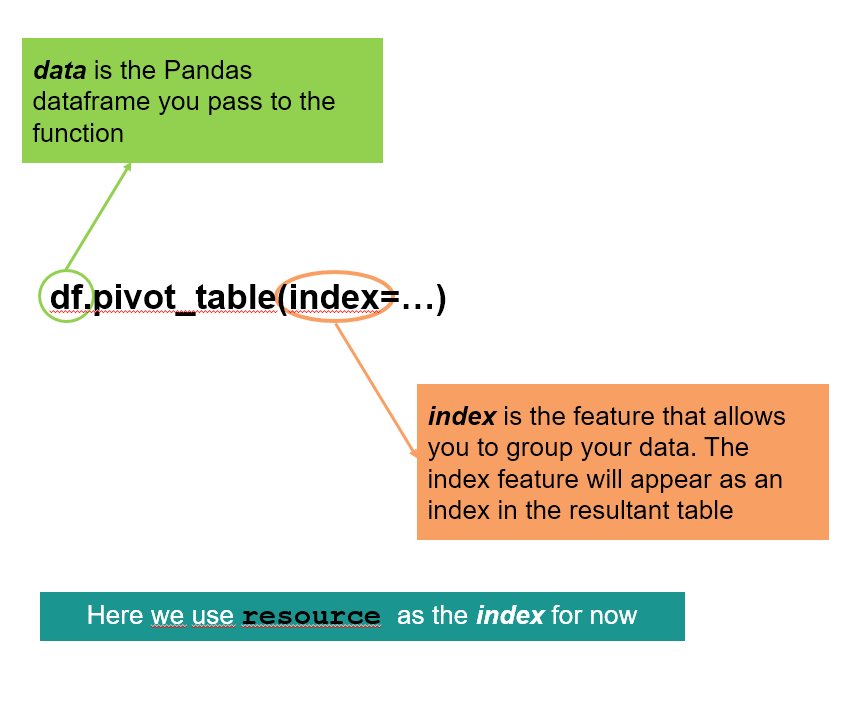

## How to group data using index in a pivot table?!

In [33]:
#a single index
table = pd.pivot_table(data=df1,index=['resource']) # default aggfunc=mean
table 

,data_value,year
resource,,
Biogas,3.151812e+04,2013.500000
Coal,2.422786e+03,2013.500000
Gas,7.630143e+03,2013.500000
Geothermal,8.431096e+05,2013.500000
Hydro,3.319291e+06,2013.500000
Oil,1.257143e+01,2013.500000
Renewable,3.842671e+06,2013.500000
Solar,4.851793e+03,2013.500000
Total generation,3.683222e+05,2013.341463


In [34]:
#a single index
table = pd.pivot_table(data=df1,index=['resource'], aggfunc='max') # default aggfunc=mean
table 

,data_value,flag,magnitude,units,variable,year
resource,,,,,,
Biogas,122269.0,R,Thousands,Number,Resource rent,2020
Coal,4786.0,R,Actual,Gigawatt hours,Generation,2020
Gas,11551.0,R,Actual,Gigawatt hours,Generation,2020
Geothermal,3640002.0,R,Thousands,Number,Resource rent,2020
Hydro,12087434.0,R,Thousands,Number,Resource rent,2020
Oil,98.0,R,Actual,Gigawatt hours,Generation,2020
Renewable,17144576.0,R,Thousands,Number,Resource rent,2020
Solar,64646.0,R,Thousands,Number,Resource rent,2020
Total generation,1242336.0,R,Thousands,Number,Resource rent,2020


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

### <span style='color: purple'> What if we wanna use different aggfunc</span>

In [35]:
#different aggregate functions
#table = pd.pivot_table(df1,index=['resource','variable'],aggfunc={'year':np.min,'data_value':np.mean})
#table.sample(10)

data_value  year
resource         variable                          
Hydro            Opening stock   9.571437e+06  2007
Wind             Opening stock   7.020837e+05  2007
Geothermal       Opening stock   2.344796e+06  2007
Solar            Closing stock   1.378950e+04  2007
Renewable        Resource rent   3.947628e+05  2007
                 Gigawatt hours  7.635714e-01  2007
Wind             Generation      1.801143e+03  2007
Total generation Prices          7.330769e+01  2007
Geothermal       Resource rent   1.462386e+05  2007
Renewable        Closing stock   1.315875e+07  2007

***value*** parameter is where you tell the function which features to aggregate on. It is an optional field and if you don’t specify this value, then the function will aggregate on all the **numerical features** of the dataset:


In [ ]:
#table = pd.pivot_table(df,index=['resource','variable'],values=['data_value'], aggfunc=np.mean)
#table.head()

This **columns** parameter is optional and displays the values horizontally on the top of the resultant table.

Both **columns** and the **index** parameters are optional, but using them effectively will help you to intuitively understand the relationship between the features.

In [ ]:
#table = pd.pivot_table(df1,index=['resource','variable'],columns=['flag'],values=['data_value'], aggfunc=np.mean)
#table.head()

## handle with the NaN values

In [ ]:
#handling null values
table = pd.pivot_table(df1,index=['resource','variable'],columns=['flag'],values=['data_value'], aggfunc=np.mean,fill_value=np.mean(df1['data_value']))
table

### [Information](https://infoshare.stats.govt.nz/)<br>
### [Data-downloaded](https://www.stats.govt.nz/large-datasets/csv-files-for-download/)

Cohort life tables track the mortality experience of people born in each year from 1876. These complement the more common period life tables which show the mortality experience in a specific time period.

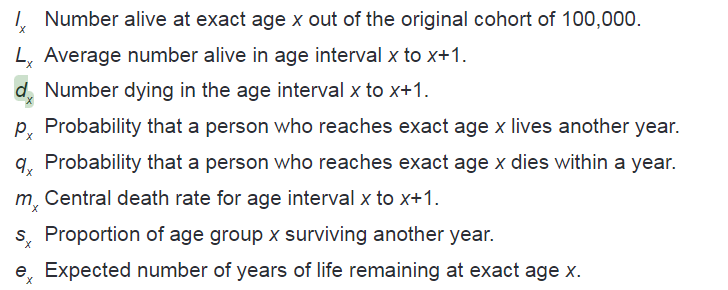

In [ ]:
def get_unique_general(data,columns):
    l=[]
    for i in range(0,len(columns)):
        l.append(data[columns[i]].unique())
    return list(zip(columns, l))   

get_unique_general(pop,pop.columns[1:])

In [ ]:
## Put the data into pivot table!

In [ ]:
#a single index
table_pop = pd.pivot_table(data=pop,index=['sex']) # aggfunc=mean as default
table_pop

In [ ]:
# multi-index
table_pop = pd.pivot_table(data=pop,index=['sex'],columns=['dx','ex'],values=['age'],aggfunc=np.mean)
table_pop